From the titanic data set we are predicting, chances of a person surviving with some of the factors he is having

# Collecting the data 

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math 
import io
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [97]:
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
print(df)

Saving titanic.csv to titanic (2).csv
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                             

In [98]:
print(len(df))         # print(len(df.index)) also does the same 

891


# Analyzing Data

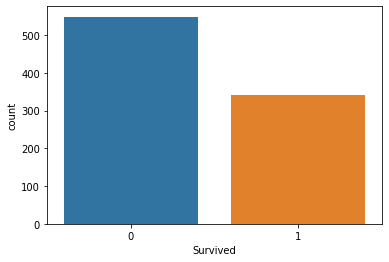

In [99]:
sns.countplot(x = "Survived", data = df)      # we can say that less survived

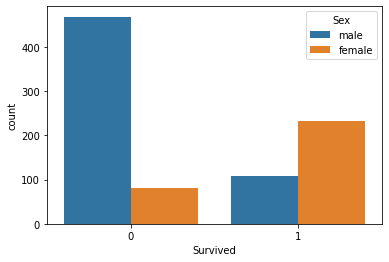

In [100]:
sns.countplot(x = "Survived", hue = "Sex", data = df)    #lets compare how many male survived and female survived etc

# we can see more female survived

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


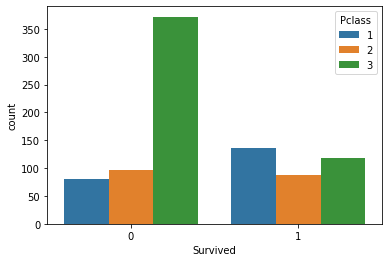

In [101]:
sns.countplot("Survived", hue = "Pclass", data = df)

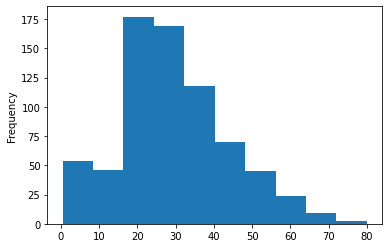

In [102]:
df["Age"].plot.hist()         # we can see no of persons with ages as shown 

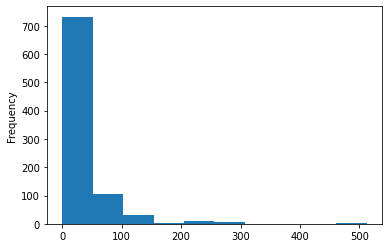

In [103]:
df["Fare"].plot.hist()          # not properly known so fixed no of bins and figure size

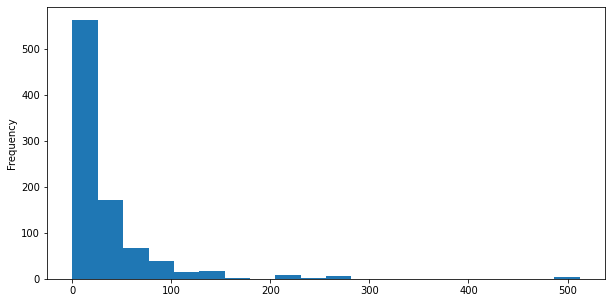

In [104]:
df["Fare"].plot.hist(bins = 20, figsize = (10,5))      # here it is somewhat clear

In [105]:
# lets see what all columns we left and what all we saw till now 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Passenger ID is of no use, we saw Pclass, number of survived, saw no of male and female sruvived, we saw fare etc lets see reamining columns too 

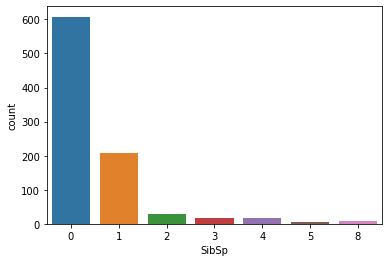

In [106]:
# sns.countplot("Survived", hue = "SibSp", data = df)      this is not of much clarity
sns.countplot(x = "SibSp", data = df)

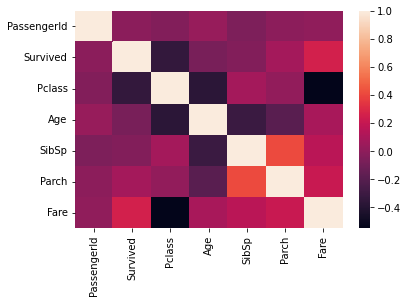

In [107]:
sns.heatmap(df.corr())

# Data Wrangling 

This means cleaning our data, if we have large datasets we might be having some NaN values or null values, it is important to look after that, it is vital to remove all the unnecessary items in the dataset, removing directly might effect the accuracy, we remove all the nan values and the columns which has null value in the dataset

In [108]:
df.isnull()

# basically checks the missing data and the result is in boolean fromat true means null false means not null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [109]:
df.isnull().sum()    # this prints number of null/nan in each column

# You can see for age/ and cabin has more

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

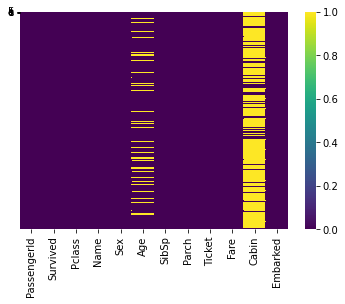

In [110]:
# we can even see it in the heatmap
sns.heatmap(df.isnull(), yticklabels= "False", cmap = "viridis")        #cmap is for colour otherwise we get black and white

We can remove this null values either by replacing them with some dummy values or we can simply drop the column, if we see cabin column has more null values then followed by age 

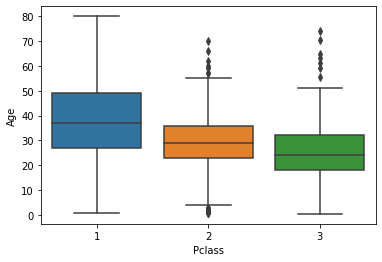

In [111]:
sns.boxplot(x = "Pclass", y = "Age", data = df)

In [112]:
# Now we will remove the Cabin as it has more nan values 

df.drop("Cabin", axis= 1, inplace = True)

In [113]:
print(df.head(5))     # Cabin has been dropped once dropped it is dropped no need to run the cell multiple times if you want to run again run from the start

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [114]:
# Now we will drop all the na values 
df.dropna(inplace = True)
print(df)              #dropping rows which has na values

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
885          886         0       3   
886          887         0       2   
887          888         1       1   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

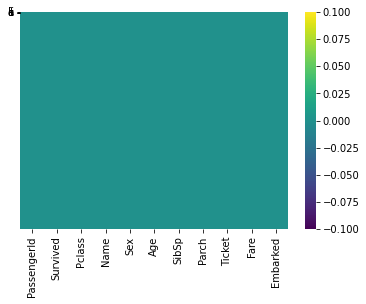

In [115]:
sns.heatmap(df.isnull(), yticklabels= "False", cmap = "viridis")  
# this basically checks whether all the null values have been removed or not, we can see it is removed u can have black and white to

In [116]:
df.isnull().sum()       # we can see no null values 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Actually we can even replace the data with mean value etc... too

If we see we have a lot of string values, so we have to convert them into categorical values in order to implement the logistic regression, so we convert to strings into some categorical variables(dummy variables), which can be done using pandas, while doing ML we have to take care of strings, from strings we can not predict anything 

In [117]:
gender = pd.get_dummies(df["Sex"], drop_first = True)
print(gender.head())

# but we do not need both the columns one column is enought to say this as if not female then male, so dropping one row

   male
0     1
1     0
2     0
3     0
4     1


In [118]:
# embark = pd.get_dummies(df["Embarked"])
# print(embark.head()) If we see by uncommenting this, we can say that if either C, Q or S is 1 then  other are 0 but if we know one is zero we can not say which other is 1,
# so we drop the first column
embark = pd.get_dummies(df["Embarked"], drop_first = True)
print(embark.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [119]:
# similarly like above for Pclass

# pclass = pd.get_dummies(df["Pclass"])
# print(pclass.head()) If we see by uncommenting this, we can say that if either 1, 2 or 3 is 1 then  other are 0 but if we know one is zero we can not say which other is 1,
# so we drop the first column
pclass = pd.get_dummies(df["Pclass"], drop_first = True)
print(pclass.head())


   2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1


So we made the values as categorical, so our next step will be we need all these new rows into a dataset

In [120]:
df = pd.concat([df,gender,embark,pclass], axis=1)
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0 

We will drop pclass, sex, embarked and also we drop passengerID, we do not need name, we do not need ticket too so we will drop them 

In [121]:
df.drop(['Sex','Name','PassengerId','Pclass','Embarked','Ticket'], axis= 1, inplace = True)    # removing all the unnecessary columns 
print(df.head(5))

   Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1


So now we are done with cleaning the data, so now we have to train and testing the data 
# Training and Testing the data 

In [122]:
Y = df.iloc[:,0].values # taking only first column 
# X = df.drop("Survived", axis = 1)  We can just take all the columns except the survived column with out dropping to by X = df.iloc[:, :0]
X = df.iloc[:,[1,2,3,4,5,6,7,8,9]]
print(X.head())
#print(Y)
#df.dtypes

    Age  SibSp  Parch     Fare  male  Q  S  2  3
0  22.0      1      0   7.2500     1  0  1  0  1
1  38.0      1      0  71.2833     0  0  0  0  0
2  26.0      0      0   7.9250     0  0  1  0  1
3  35.0      1      0  53.1000     0  0  1  0  0
4  35.0      0      0   8.0500     1  0  1  0  1


In [123]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)         # taking 0.3 which means o.3 times no of rows as test size we can even take 0.2 it gave 91.1% accuracy

In [125]:
# we are scaling as 1k values are present or else it will effect the accuracy a lot as it changed from 60 to 81

# if running first we got an error running again then it is not showing that error
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [126]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 0)

In [127]:
logmodel.fit(X_train,Y_train)        # there is a problem over here check over it

LogisticRegression(random_state=0)

In [128]:
predictions = logmodel.predict(X_test)

In [129]:
from sklearn.metrics import classification_report
classification_report(Y_test,predictions) 

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85        82\n           1       0.84      0.70      0.77        61\n\n    accuracy                           0.82       143\n   macro avg       0.82      0.80      0.81       143\nweighted avg       0.82      0.82      0.82       143\n'

In [130]:
from sklearn.metrics import f1_score
f1_score(Y_test,predictions, average ='weighted') # adding this weighted our accuracy got increased to 81 from 76

0.8152895954620092